In [1]:
import control 
import numpy as np 
import matplotlib.pyplot as plt
import pyfirmata
import time
import pandas as pd


In [2]:
#https://realpython.com/arduino-python/
#pip install pyfirmata
#### --------------------------- CHECKING CODE --------------------------------

board = pyfirmata.Arduino('/dev/ttyACM0')
idPwm = 8;
while True:
    board.digital[idPwm].write(1)
    time.sleep(1)
    board.digital[idPwm].write(0)
    time.sleep(1)

KeyboardInterrupt: 

In [3]:
board.digital[idPwm].write(0)

In [21]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5;
flgStart = 1;
Ts = 0.02;
idxTimer = 0; 
Tab_val = [0];
Tab_time = [0];
uControl = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(uControl)
time.sleep(1)

while flgStart == 1:
        u = 1;
        board.digital[idPwm].write(u)
        valRaw = potentiometer.read();
        print(valRaw)
        val = valRaw * A2D_v;
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_val.append(val);
        uControl.append(5*u);
        Tab_time.append(idxTimer*Ts);

        if idxTimer == Ts*3000:
            flgStart = 0; 
    

0.0059
0.087
0.1926
0.2805
0.3617
0.4301
0.4917
0.5494
0.5943
0.6383
0.6755
0.7097
0.74
0.7674
0.8133
0.8133
0.8328
0.8641
0.8768
0.8886
0.8993
0.911
0.9189
0.9257
0.9345
0.9404
0.9453
0.9521
0.955
0.9589
0.9638
0.9668
0.9736
0.9746
0.9756
0.9795
0.9804
0.9814
0.9824
0.9844
0.9863
0.9883
0.9863
0.9892
0.9892
0.9922
0.9912
0.9912
0.9932
0.9941
0.9922
0.9951
0.9941
0.9951
0.9941
0.9961
0.9961
0.9961
0.9971
0.9961


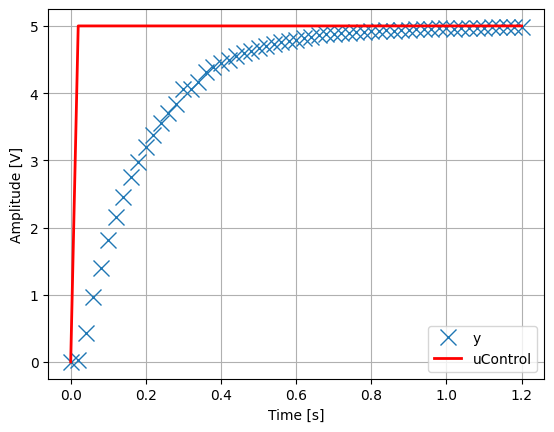

In [22]:
plt.plot(Tab_time,Tab_val,'x',linewidth = 2, markersize=12,label='y')
plt.plot(Tab_time,uControl,'r',linewidth = 2,label='uControl')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

In [16]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5;
flgStart = 1;
Ts = 0.02;
idxTimer = 0; 
Tab_val = [0];
Tab_time = [0];
uControl = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(uControl)
time.sleep(1)

while flgStart == 1:

        if idxTimer < 4000*Ts or (idxTimer > 2*4000*Ts and idxTimer < 3*4000*Ts):
            u = 1;
        else:
            u = 0;

        board.digital[idPwm].write(u)
        valRaw = potentiometer.read();
        print(valRaw)
        val = valRaw * A2D_v;
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_val.append(val);
        uControl.append(5*u);
        Tab_time.append(idxTimer*Ts);

        if idxTimer == Ts*4000*4:
            flgStart = 0; 
    

0.0
0.0645
0.1701
0.2649
0.347
0.4154
0.4809
0.5347
0.5846
0.6285
0.6667
0.7009
0.7322
0.784
0.8055
0.826
0.8426
0.8573
0.871
0.8847
0.8954
0.9062
0.915
0.9228
0.9296
0.9374
0.9423
0.9482
0.9521
0.9609
0.9629
0.9668
0.9697
0.9726
0.9736
0.9756
0.9785
0.9814
0.9824
0.9824
0.9834
0.9844
0.9853
0.9873
0.9873
0.9883
0.9883
0.9912
0.9912
0.9932
0.9932
0.9922
0.9941
0.9932
0.9941
0.9932
0.9941
0.9941
0.9951
0.9951
0.9941
0.9951
0.9971
0.9951
0.9961
0.9961
0.9961
0.9961
0.9961
0.9961
0.9961
0.9961
0.9961
0.998
0.9971
0.9971
0.9971
0.9971
0.998
0.9961
0.998
0.9961
0.7996
0.7146
0.6334
0.566
0.5034
0.4497
0.4018
0.3597
0.3206
0.2854
0.2551
0.2287
0.2033
0.1828
0.1642
0.132
0.1193
0.1056
0.0948
0.086
0.0782
0.0694
0.0616
0.0567
0.0499
0.0459
0.0411
0.0371
0.0323
0.0313
0.0264
0.0225
0.0205
0.0186
0.0166
0.0137
0.0137
0.0117
0.0108
0.0108
0.0088
0.0078
0.0078
0.0068
0.0068
0.0049
0.0039
0.0029
0.0029
0.002
0.0029
0.0029
0.0029
0.001
0.0
0.0
0.002
0.001
0.0
0.0
0.001
0.001
0.002
0.0
0.0
0.001
0.00

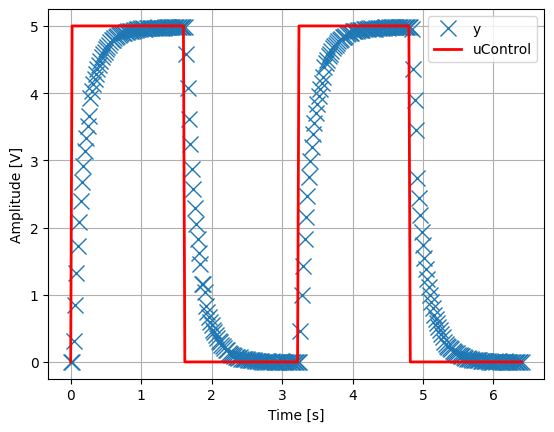

In [15]:
plt.plot(Tab_time,Tab_val,'x',linewidth = 2, markersize=12,label='y')
plt.plot(Tab_time,uControl,'r',linewidth = 2,label='uControl')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

In [23]:
dataSave = {'Time': Tab_time, 'y': Tab_val, 'u': uControl}
Res=pd.DataFrame(data=dataSave)
print(Res)
 
# Exporting data frame to a csv/Excel file
# Many other options are available which can be seen using dot tab option
 
# Exporting data as a excel file
Res.to_excel('/home/traximus/Schreibtisch/Development/02_GitHub/Traximus27.github.io/Arduino/Res_Identification.xlsx')

    Time       y  u
0   0.00  0.0000  0
1   0.02  0.0295  5
2   0.04  0.4350  5
3   0.06  0.9630  5
4   0.08  1.4025  5
..   ...     ... ..
56  1.12  4.9805  5
57  1.14  4.9805  5
58  1.16  4.9805  5
59  1.18  4.9855  5
60  1.20  4.9805  5

[61 rows x 3 columns]
